In [1]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('./data/csv/denormalized/nuclear_power_plants.csv')

display(df.head())


,Id,Name,Latitude,Longitude,Country,CountryCode,Status,ReactorType,ReactorModel,ConstructionStartAt,OperationalFrom,OperationalTo,Capacity,LastUpdatedAt,Source,IAEAId
0,1,Ågesta,59.206000,18.08290,Sweden,SE,Shutdown,PHWR,NaN,1957-12-01,1964-05-01,1974-06-02,9.0,2015-05-24T04:51:37+03:00,WNA/IAEA,528.0
1,2,Akademik Lomonosov-1,69.709579,170.30625,Russia,RU,Operational,PWR,KLT-40S 'Floating',2007-04-15,2020-05-22,NaN,30.0,2021-05-31,WNA/IAEA/Google Maps,895.0
2,3,Akademik Lomonosov-2,69.709579,170.30625,Russia,RU,Operational,PWR,KLT-40S 'Floating',2007-04-15,2020-05-22,NaN,30.0,2021-05-31,WNA/IAEA/Google Maps,896.0
3,4,Akhvaz-1,NaN,NaN,Iran,IR,Planned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WNA,NaN
4,5,Akhvaz-2,NaN,NaN,Iran,IR,Planned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WNA,NaN


In [2]:
countries = df['CountryCode'].unique()

print(countries)

['SE' 'RU' 'IR' 'TR' 'KZ' 'ES' 'BR' 'US' 'AM' 'AR' 'AE' 'IN' 'BY' 'BG'
 'FR' 'GB' 'CH' 'DE' 'SK' 'NL' 'BE' 'CA' 'IT' 'CN' 'RO' 'PK' 'UA' 'TW'
 'CZ' 'EG' 'JP' 'KR' 'LT' 'ID' 'ZA' 'SI' 'MX' 'FI' 'HU' 'BD' 'AT']


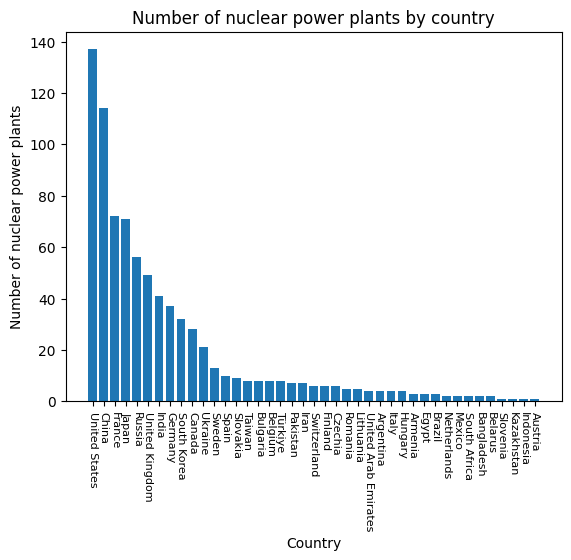

Top 10 countries with the most nuclear power plants
United States: 137
China: 114
France: 72
Japan: 71
Russia: 56
United Kingdom: 49
India: 41
Germany: 37
South Korea: 32
Canada: 28


In [3]:
country_usine = df.groupby('Country')['Name'].count()
country_usine = country_usine.sort_values(ascending=False)

countries = country_usine.index
usines = country_usine.values

avg_usines_per_country = usines.mean()

plt.bar(countries, usines)
plt.xticks(rotation=-90, fontsize=8)
plt.xlabel("Country")
plt.ylabel("Number of nuclear power plants")
plt.title("Number of nuclear power plants by country")

plt.show()

print("Top 10 countries with the most nuclear power plants")
for i in range(10):
    print(f"{countries[i]}: {usines[i]}")

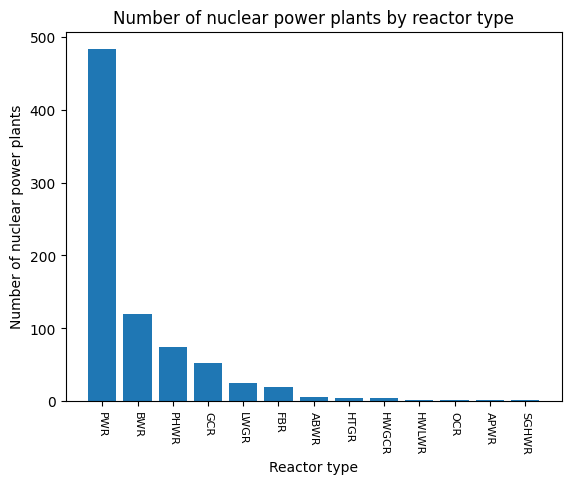

Number of nuclear power plants by Type of Reactor
PWR: 483
BWR: 120
PHWR: 74
GCR: 52
LWGR: 25
FBR: 19
ABWR: 6
HTGR: 5
HWGCR: 4
HWLWR: 2
OCR: 2
APWR: 1
SGHWR: 1


In [4]:
reactors_by_type = df.groupby('ReactorType')['Name'].count()

reactors_by_type = reactors_by_type.sort_values(ascending=False)

plt.bar(reactors_by_type.index, reactors_by_type.values)
plt.xticks(rotation=-90, fontsize=8)
plt.xlabel("Reactor type")
plt.ylabel("Number of nuclear power plants")
plt.title("Number of nuclear power plants by reactor type")
plt.show()

print("Number of nuclear power plants by Type of Reactor")
for i in range(len(reactors_by_type)):
    print(f"{reactors_by_type.index[i]}: {reactors_by_type.values[i]}")

### Estranho ter algumas que só tem um ou duas delas. São modelos sigilosos?


In [5]:
SGHWR_power_plants = df[df['ReactorType'] == 'SGHWR']
display(SGHWR_power_plants)

,Id,Name,Latitude,Longitude,Country,CountryCode,Status,ReactorType,ReactorModel,ConstructionStartAt,OperationalFrom,OperationalTo,Capacity,LastUpdatedAt,Source,IAEAId
729,739,Winfrith SGHWR,50.68,-2.272,United Kingdom,GB,Shutdown,SGHWR,NaN,1963-05-01,1968-01-01,1990-09-11,92.0,2015-05-24T04:51:12+03:00,WNA/IAEA,239.0


### Foi desativada. Faz algum sentido.

Inclusive a gente tem ReactorModel e ReactorType. Qual é a diferença?

In [6]:
models = df['ReactorModel'].unique()
print(f"Existem {len(models)} Modelos de reatores")

Existem 164 Modelos de reatores


## Queria saber quais reatores estão ativos e quais estão inativos

In [7]:
deactivated_reactors = df[df['Status'] == 'Shutdown']

display(deactivated_reactors)

,Id,Name,Latitude,Longitude,Country,CountryCode,Status,ReactorType,ReactorModel,ConstructionStartAt,OperationalFrom,OperationalTo,Capacity,LastUpdatedAt,Source,IAEAId
0,1,Ågesta,59.206,18.0829,Sweden,SE,Shutdown,PHWR,NaN,1957-12-01,1964-05-01,1974-06-02,9.0,2015-05-24T04:51:37+03:00,WNA/IAEA,528.0
9,10,Aktau (Shevchenko),43.607,51.2830,Kazakhstan,KZ,Shutdown,FBR,BN-350,1964-10-01,1973-07-16,1999-04-22,52.0,2021-10-01T00:14:53+03:00,WNA/IAEA,414.0
15,16,APS-1 Obninsk,55.084,36.5700,Russia,RU,Shutdown,LWGR,AM-1,1951-01-01,1954-12-01,2002-04-29,5.0,2015-05-24T04:51:32+03:00,WNA/IAEA,447.0
18,19,Armenian-1,40.182,44.1470,Armenia,AM,Shutdown,PWR,VVER V-270,1969-07-01,1977-10-06,1989-02-25,376.0,2021-06-07,WNA/IAEA,1.0
35,36,Barseback-1,55.745,12.9260,Sweden,SE,Shutdown,BWR,AA-II,1971-02-01,1975-07-01,1999-11-30,570.0,2018-03-10T14:52:00+02:00,WNA/IAEA,538.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,750,Wylfa-1,53.416,-4.4800,United Kingdom,GB,Shutdown,GCR,MAGNOX,1963-09-01,1971-11-01,2015-12-30,550.0,2016-03-09T18:43:09+02:00,WNA/IAEA,240.0
741,751,Wylfa-2,53.416,-4.4800,United Kingdom,GB,Shutdown,GCR,MAGNOX,1963-09-01,1972-01-03,2012-04-25,550.0,2015-05-24T04:51:13+03:00,WNA/IAEA,241.0
754,764,Yankee Rowe,42.728,-72.9290,United States,US,Shutdown,PWR,PWR,1957-11-01,1961-07-01,1991-10-01,175.0,2015-05-24T04:51:43+03:00,WNA/IAEA,638.0
762,778,Zion-1,42.446,-87.8010,United States,US,Shutdown,PWR,WH 4LP,1968-12-01,1973-12-31,1998-02-13,1040.0,2017-02-10T23:58:20+02:00,WNA/IAEA,640.0


### Tendo em vista que temos 209 reatores desativados. Faz sentido verificarmos a quantidade de reatores ativos, inativos e planejados por país

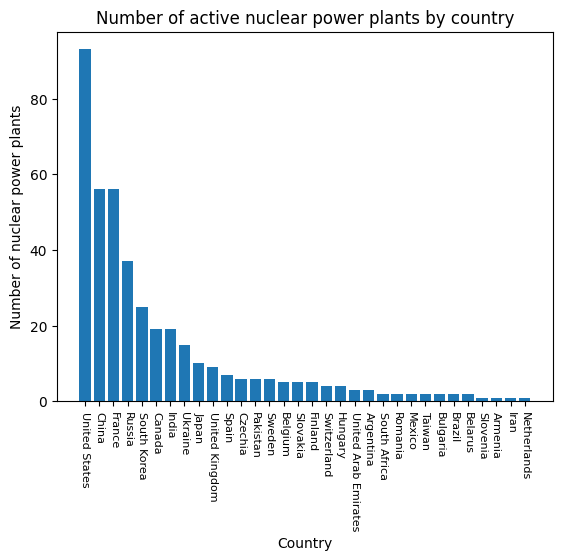

Top 10 countries with the most active nuclear power plants
United States: 93
China: 56
France: 56
Russia: 37
South Korea: 25
Canada: 19
India: 19
Ukraine: 15
Japan: 10
United Kingdom: 9


In [8]:
active_reactors = df[df['Status'] == 'Operational']

active_reactors_per_country = active_reactors.groupby('Country')['Name'].count()
active_reactors_per_country = active_reactors_per_country.sort_values(ascending=False)
plt.bar(active_reactors_per_country.index, active_reactors_per_country.values)
plt.xticks(rotation=-90, fontsize=8)
plt.xlabel("Country")
plt.ylabel("Number of nuclear power plants")
plt.title("Number of active nuclear power plants by country")
plt.show()

print("Top 10 countries with the most active nuclear power plants")
for i in range(10):
    print(f"{active_reactors_per_country.index[i]}: {active_reactors_per_country.values[i]}")

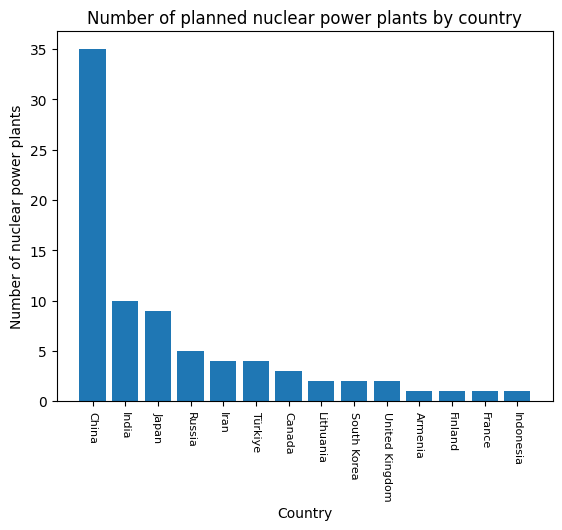

Top 10 countries with the most planned nuclear power plants
China: 35
India: 10
Japan: 9
Russia: 5
Iran: 4
Türkiye: 4
Canada: 3
Lithuania: 2
South Korea: 2
United Kingdom: 2


In [9]:
planned_reactors = df[df['Status'] == 'Planned']

planned_reactors_per_country = planned_reactors.groupby('Country')['Name'].count()
planned_reactors_per_country = planned_reactors_per_country.sort_values(ascending=False)
plt.bar(planned_reactors_per_country.index, planned_reactors_per_country.values)
plt.xticks(rotation=-90, fontsize=8)
plt.xlabel("Country")
plt.ylabel("Number of nuclear power plants")
plt.title("Number of planned nuclear power plants by country")
plt.show()

print("Top 10 countries with the most planned nuclear power plants")
for i in range(10):
    print(f"{planned_reactors_per_country.index[i]}: {planned_reactors_per_country.values[i]}")

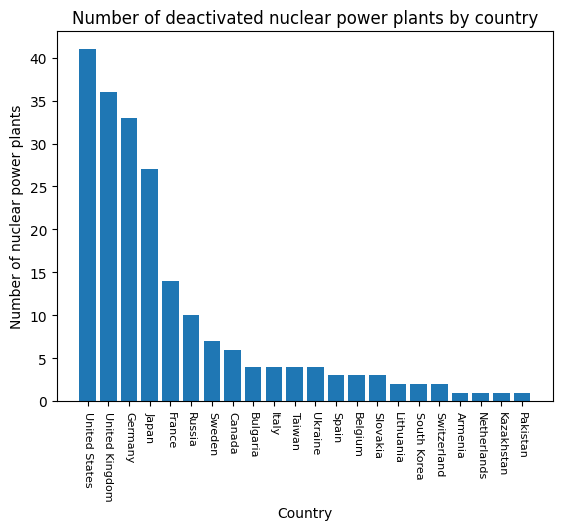

Top 10 countries with the most deactivated nuclear power plants
United States: 41
United Kingdom: 36
Germany: 33
Japan: 27
France: 14
Russia: 10
Sweden: 7
Canada: 6
Bulgaria: 4
Italy: 4


In [10]:
deactivated_reactors_per_country = deactivated_reactors.groupby('Country')['Name'].count()
deactivated_reactors_per_country = deactivated_reactors_per_country.sort_values(ascending=False)
plt.bar(deactivated_reactors_per_country.index, deactivated_reactors_per_country.values)
plt.xticks(rotation=-90, fontsize=8)
plt.xlabel("Country")
plt.ylabel("Number of nuclear power plants")
plt.title("Number of deactivated nuclear power plants by country")
plt.show()

print("Top 10 countries with the most deactivated nuclear power plants")
for i in range(10):
    print(f"{deactivated_reactors_per_country.index[i]}: {deactivated_reactors_per_country.values[i]}")

In [11]:
reactor_sorted_by_capacity = df.sort_values(by='Capacity', ascending=False)

print("Top 10 nuclear power plants by capacity")
for i in range(10):
    display(reactor_sorted_by_capacity.iloc[i][['Country', 'Name', 'Capacity']])

Top 10 nuclear power plants by capacity


Country         China
Name        Taishan-1
Capacity       1660.0
Name: 666, dtype: object

Country         China
Name        Taishan-2
Capacity       1660.0
Name: 667, dtype: object

Country       United Kingdom
Name        Hinkley Point-C2
Capacity              1630.0
Name: 315, dtype: object

Country            France
Name        Flamanville-3
Capacity           1630.0
Name: 218, dtype: object

Country       United Kingdom
Name        Hinkley Point-C1
Capacity              1630.0
Name: 314, dtype: object

Country         Finland
Name        Olkiluoto-3
Capacity         1600.0
Name: 505, dtype: object

Country         China
Name        CAP1400-2
Capacity       1534.0
Name: 784, dtype: object

Country         China
Name        CAP1400-1
Capacity       1534.0
Name: 783, dtype: object

Country      Lithuania
Name        Ignalina-2
Capacity        1500.0
Name: 331, dtype: object

Country      Lithuania
Name        Ignalina-1
Capacity        1500.0
Name: 330, dtype: object

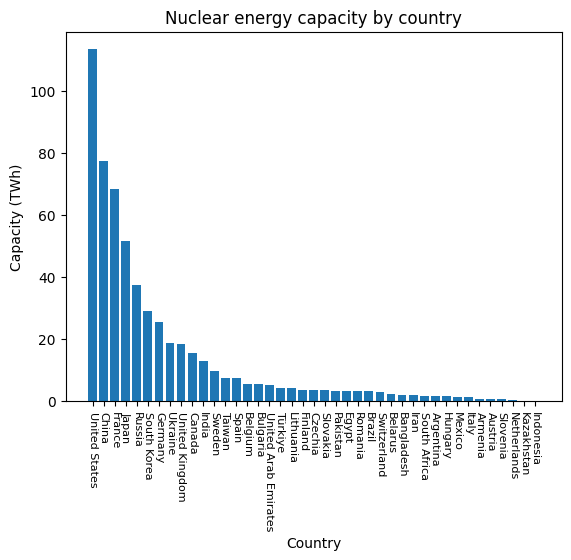

Top 10 countries with the most nuclear energy capacity
United States: 113.413 TWh
China: 77.547 TWh
France: 68.538 TWh
Japan: 51.68 TWh
Russia: 37.548 TWh
South Korea: 29.039 TWh
Germany: 25.593 TWh
Ukraine: 18.865 TWh
United Kingdom: 18.445 TWh
Canada: 15.62 TWh


In [12]:
nuclear_energy_per_country = df.groupby('Country')['Capacity'].sum()
nuclear_energy_per_country = nuclear_energy_per_country.sort_values(ascending=False)
plt.bar(nuclear_energy_per_country.index, nuclear_energy_per_country.values/1000)
plt.xticks(rotation=-90, fontsize=8)
plt.xlabel("Country")
plt.ylabel("Capacity (TWh)") # Não tenho certeza quanto a unidade. Mas estou supondo que os dados estão em GWh
plt.title("Nuclear energy capacity by country")
plt.show()

print("Top 10 countries with the most nuclear energy capacity")
for i in range(10):
    print(f"{nuclear_energy_per_country.index[i]}: {nuclear_energy_per_country.values[i]/1000} TWh")

### Um dado relevante aqui sería a quantidade de energia consumida por cada país no total a fim de fazer um ratio da energia nuclear pela energia total.